Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar.

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.


Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. 

Role of Dendrograms for Hierarchical Clustering

 one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points.
 
Suppose we have a collection of data points represented by a numpy array as follows:

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

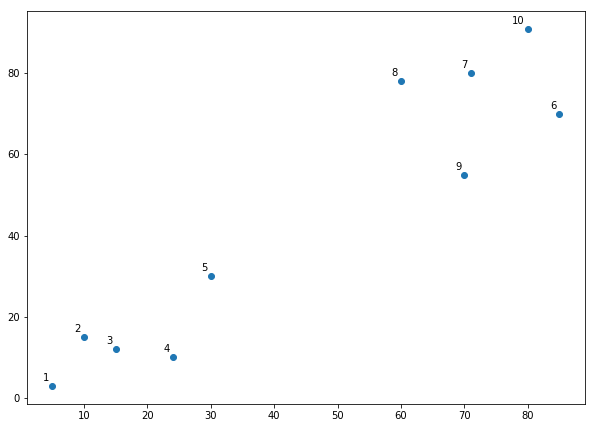

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

It can be seen from the naked eye that the data points form two clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.

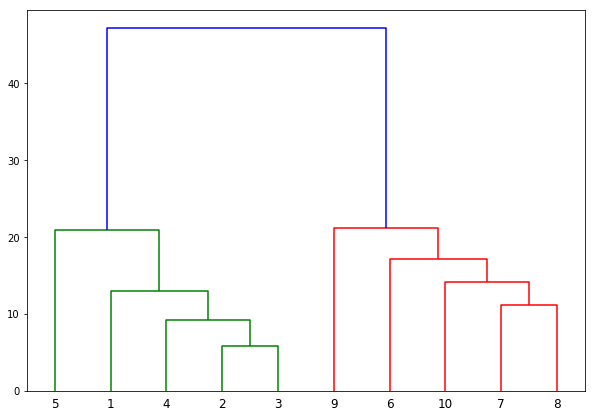

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. Take a look at the following plot:

In [5]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [7]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


As expected the first five points have been clustered together while the last five points have been clustered together. It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

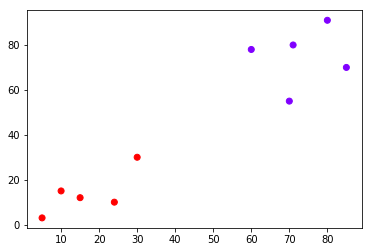

In [8]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [2]:
#Example 2

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [3]:
customer_data = pd.read_csv('shopping_data.csv')

In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [6]:
data = customer_data.iloc[:, 3:5].values

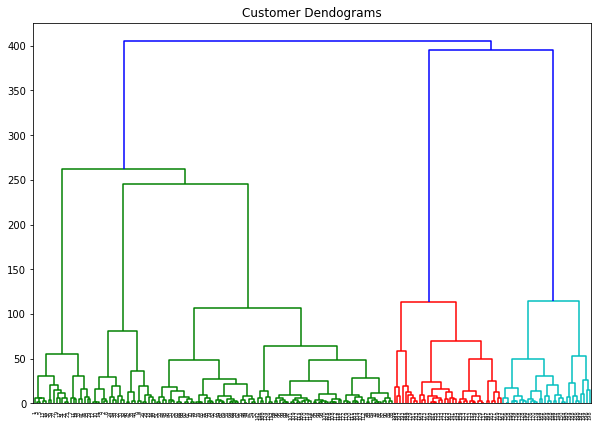

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

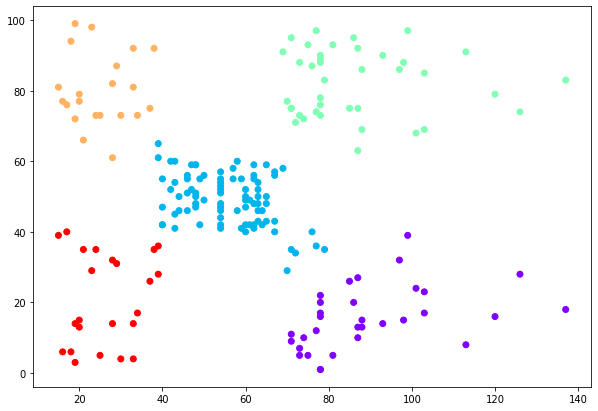

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.